In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from plot_results import collect_data, plot_training_curves, plot_fprfnr

from arguments import prepare_finetuning_args, Args
args = prepare_finetuning_args()

def lighten(color, amount=0.4):
    """
    Rende 'color' più chiaro miscelandolo col bianco.
    amount in [0,1]: 0 = identico, 1 = bianco.
    """
    c = np.array(mcolors.to_rgb(color))
    return tuple(c + (1 - c) * amount)

In [2]:
unbalanced_weighted = collect_data('./output/old_logs/log_weighted.txt')
unbalanced = collect_data('./output/old_logs/log_train_unbalanced.txt')
balanced = collect_data('./output/old_logs/log_90_lrbest2.txt')

In [3]:
results = [unbalanced_weighted, unbalanced, balanced]
names   = ["UNbalanced_weighted", "UNbalanced", "balanced"]

epochs, accs, fprs, fnrs, fprs2, fnrs2 = [], [], [], [], [], []
for tuple_vars in results:
    (_, _, _, _, val_epochs, _, val_accs, _, val_fprs, val_fnrs, _, _, val2_fprs, val2_fnrs) = tuple_vars
    accs.append(val_accs)
    
    fprs.append(val_fprs)
    fnrs.append(val_fnrs)
    fprs2.append(val2_fprs)
    fnrs2.append(val2_fnrs)

    epochs.append(val_epochs)

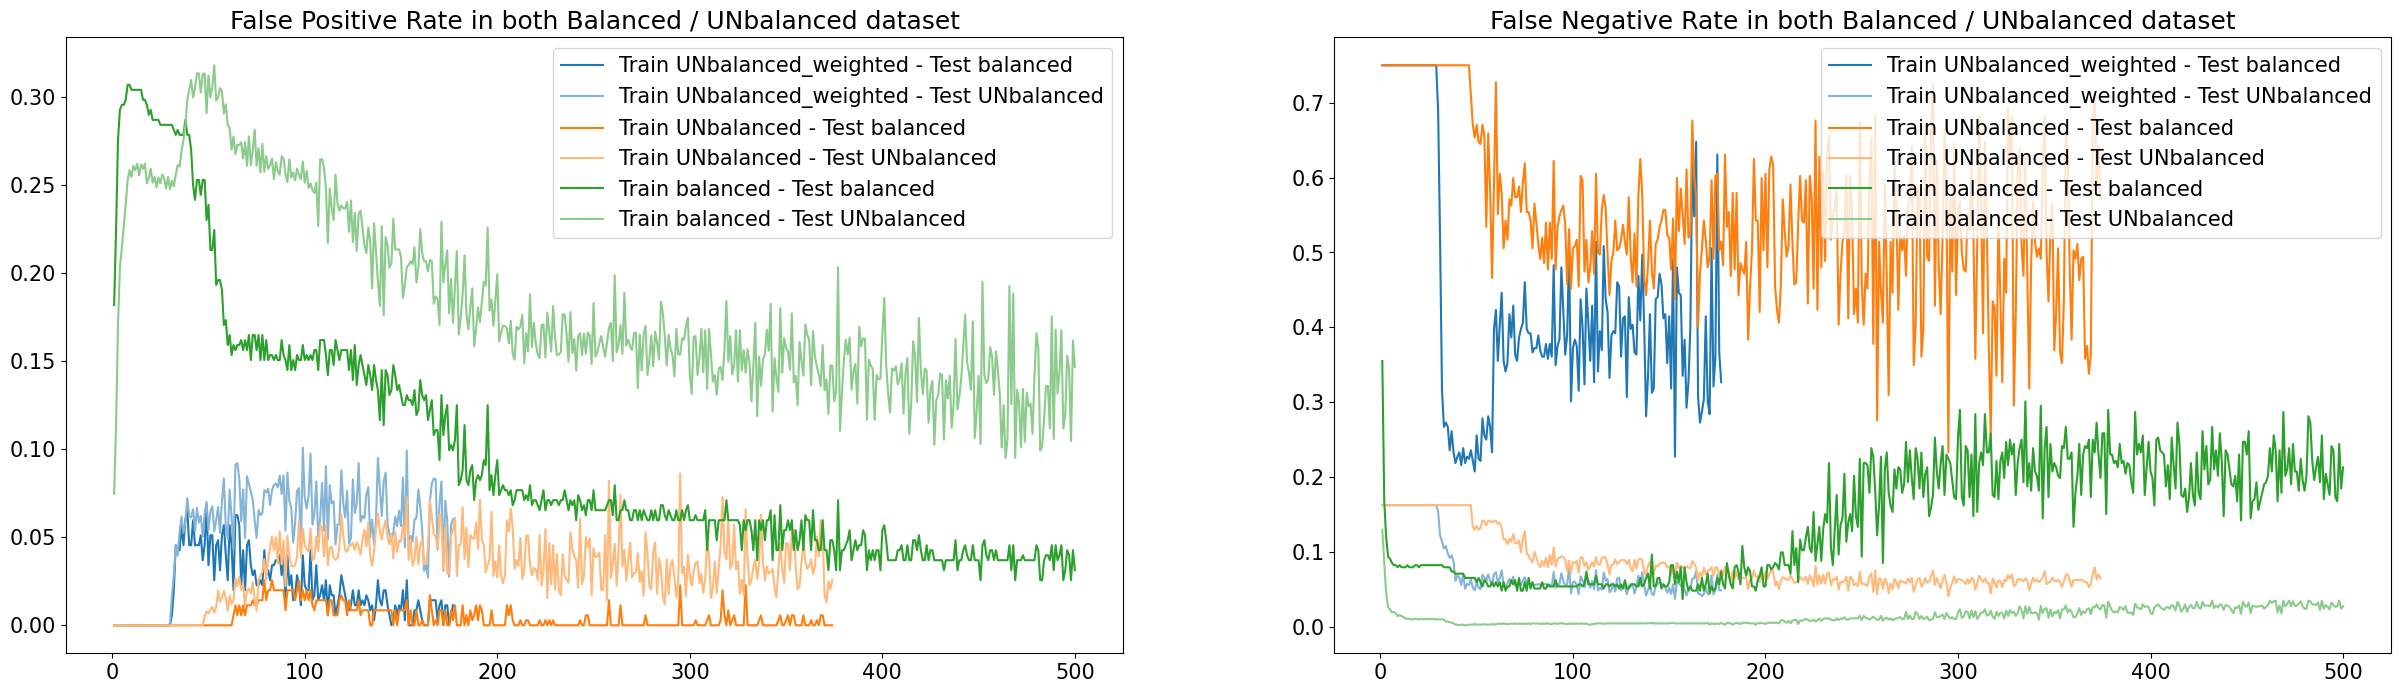

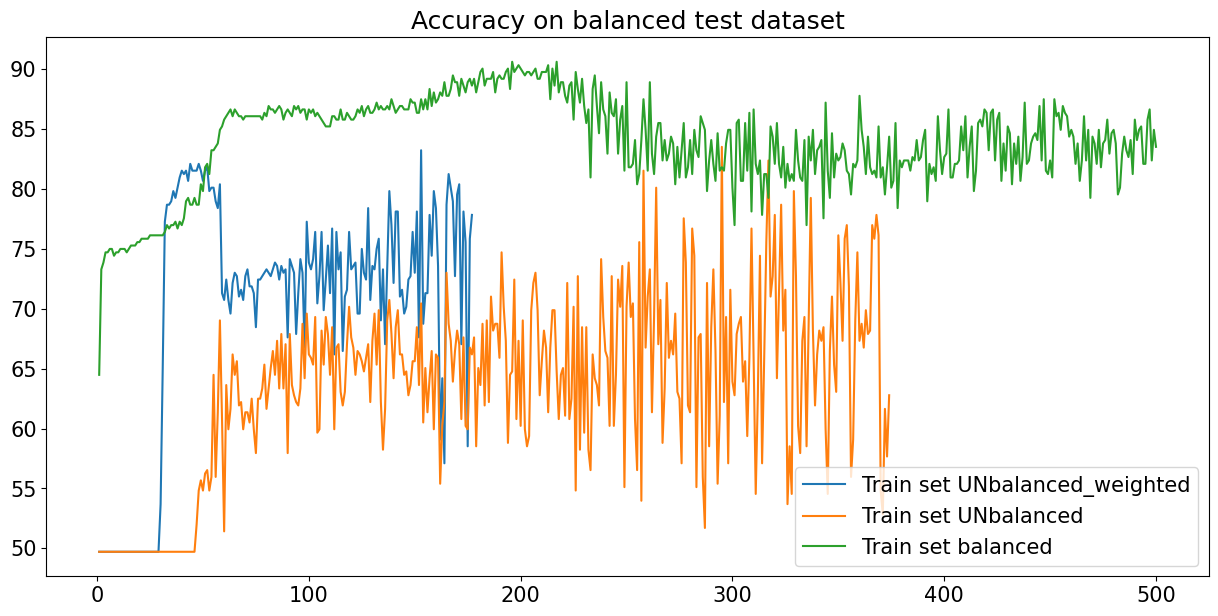

In [4]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(30, 8))

for e, fp, fp2, name in zip(epochs, fprs, fprs2, names):
    p, = ax.plot(e, fp, label=f"Train {name} - Test balanced")
    base = p.get_color()
    p2, = ax.plot(e, fp2, label=f"Train {name} - Test UNbalanced", color=lighten(base, amount=0.45))
ax.legend()
ax.set_title("False Positive Rate in both Balanced / UNbalanced dataset")

for e, fn, fn2, name in zip(epochs, fnrs, fnrs2, names):
    p, = ax2.plot(e, fn, label=f"Train {name} - Test balanced")
    base = p.get_color()
    p2, = ax2.plot(e, fn2, label=f"Train {name} - Test UNbalanced", color=lighten(base, amount=0.45))
ax2.legend()
ax2.set_title("False Negative Rate in both Balanced / UNbalanced dataset")

plt.savefig("FPR_FNR_comparison.png")
plt.show()



fig, ax = plt.subplots(figsize=(15, 7))
for e, a, name in zip(epochs, accs, names):
    ax.plot(e, a, label=f"Train set {name}")

ax.legend()
plt.title("Accuracy on balanced test dataset")
plt.show()

